# Installing and Using Pandas

Pandas is a powerful data manipulation tool built on top of NumPy. The tools found within Pandas make it special in that it can be more expressive than other libraries when manipulating data. It also integrates well with the matplotlib library which makes for an easy transition into data analysis. Further, Pandas provides fast data processing as a part of NumPy, and is a powerful tool in manipulating DataFrames. 

To install Pandas, I recommend using Anaconda. Anaconda is an open-source distribution of Python and R programming languages that simplifies package management and deployment. After installing Anaconda, all you have to do is open a new Jupyter Notebook to use Pandas within Python as it comes pre-installed. There are over 750 libraries that come pre-installed making it one of the best ways to use Python. 

The following line imports the library for pandas. When operating within the library, always call the library as "pd".


In [3]:
import pandas as pd

# Data Frames and Series

DataFrames are multidimensional arrays that can be easily accessed. Within a DataFrame are columns and rows. The columns contain data for specific variables and rows contain data measurements for each specific variable. DataFrame rows can contain data that is numeric, character, logical, etc. The Pandas library has DataFrames that consist of 3 components: data, index, and columns.

Series are single column DataFrames. A DataFrame may contain one or more Series and is commonly used for data manipulation

One way to create a Series is to construct a Series object. For our example, we will start by creating a series of cities:

In [78]:
pd.Series(['Ames', 'Des Moines', 'Iowa City'])

0          Ames
1    Des Moines
2     Iowa City
dtype: object

We can combine two Series to create a DataFrame. To do this, I am going to combine the Series of Iowa cities with their respective populations. The data will be inputed into the DataFrame in the form of a dictionary. The lengths of the two series I combine must be the same length otherwise the Pandas library will generate Na, or NaN where the data is missing. Within the DataFrame, I can give the columns names as well. 

In [19]:
iowa_cities = pd.Series(['Ames', 'Des Moines', 'Iowa City', 'Waterloo', 'Cedar Rapids', 'Davenport', 'Sioux City'])
iowa_populations = pd.Series([58965, 203433, 67862, 68406, 126326,99685, 82684])
college = pd.Series(['Yes', 'No', 'Yes', 'No', 'No', 'No', 'No'])

pd.DataFrame({'City_Name' : iowa_cities, 'Population' : iowa_populations, 'College' : college})

,City_Name,Population,College
0,Ames,58965,Yes
1,Des Moines,203433,No
2,Iowa City,67862,Yes
3,Waterloo,68406,No
4,Cedar Rapids,126326,No
5,Davenport,99685,No
6,Sioux City,82684,No


Pandas DataFrames makes accessing data much easier as you can access each individual element quickly. Using the index column in a Pandas DataFrame saves a lot of time when modifying data structures. 

In [53]:
iowa = pd.DataFrame({'City_Name' : iowa_cities, 'Population' : iowa_populations, 'College' : college})
iowa

,City_Name,Population,College
0,Ames,58965,Yes
1,Des Moines,203433,No
2,Iowa City,67862,Yes
3,Waterloo,68406,No
4,Cedar Rapids,126326,No
5,Davenport,99685,No
6,Sioux City,82684,No


The DataFrame allows access to each individual element by calling its column and index in one line.

In [24]:
iowa['Population'][1]

203433

Using the set_index() function, DataFrames will set the index's to a column.

In [54]:
data = iowa.set_index('City_Name')
data

,Population,College
City_Name,,
Ames,58965,Yes
Des Moines,203433,No
Iowa City,67862,Yes
Waterloo,68406,No
Cedar Rapids,126326,No
Davenport,99685,No
Sioux City,82684,No


We may call that index use the loc function to get all the data from that row.

In [55]:
data.loc['Ames']

Population    58965
College         Yes
Name: Ames, dtype: object

Pandas also makes data Manipulation much easier. We can add columns and manipulate within the columns to create new columns(this turned kinda wordy). To add a column, just call the DataFrame and the new column. Then set it equal to the series that will become the new column.

To start here, I will create a new column for the Area in square miles for each city.

In [56]:
iowa['Area square miles'] = pd.Series([24.21, 80.87, 25.01, 61.39, 70.8, 62.95, 57.35])
iowa

,City_Name,Population,College,Area square miles
0,Ames,58965,Yes,24.21
1,Des Moines,203433,No,80.87
2,Iowa City,67862,Yes,25.01
3,Waterloo,68406,No,61.39
4,Cedar Rapids,126326,No,70.80
5,Davenport,99685,No,62.95
6,Sioux City,82684,No,57.35


Then to get the population density, you can simply divide the population by the area and assign it to a new column Population density.

In [57]:
iowa['Population density'] = iowa['Population']/ iowa['Area square miles']
iowa

,City_Name,Population,College,Area square miles,Population density
0,Ames,58965,Yes,24.21,2435.563817
1,Des Moines,203433,No,80.87,2515.555830
2,Iowa City,67862,Yes,25.01,2713.394642
3,Waterloo,68406,No,61.39,1114.285714
4,Cedar Rapids,126326,No,70.80,1784.265537
5,Davenport,99685,No,62.95,1583.558380
6,Sioux City,82684,No,57.35,1441.743679


# Titanic

Now that we've covered a couple basic concepts of Pandas, let's dive into a dataset.

There is a titanic problem found on kaggle. To access it, we will need to call upon the csv file using pd.read_csv()

In [86]:
titanic = pd.read_csv('train.csv')

Let’s get some more information about the dataset using .info() and .head() functions.

In [82]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Upon first looking at the data, we can see that the Cabin column is missing a lot of its data. To get around this, we can fill in the column with 0's and 1's to show whether or not the data is present there. We will use a function to sort through the data and return 1 or 0 depending if there is data there or not. Then we can apply that function to the Cabin column.

In [141]:
def is_cabin(col):
  Cabin = col[0]
  if type(Cabin) == str:
    return 1
  else:
    return 0
 
titanic['Cabin'] = titanic[['Cabin']].apply(is_cabin, axis = 1)

Lets say we wanted to compare survival based their socio-economic status (Pclass column). Definied within the data set, the pclass column has numbers 1,2,3 for their status. 1 is upper. 2 is middle. And 3 is lower. To begin answering this question, lets use the groupby function to group the pclasses together.

In [91]:
status = titanic.groupby('Pclass').size()
status

Pclass
1    216
2    184
3    491
dtype: int64

Next, let's get the counts of survivors and none-survivors for the different Pclasses. The groupby function is able to take two parameters into account.

In [114]:
survive = titanic.groupby(['Survived', 'Pclass']).size()
survive

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

The data above is good to see by the number, but let's make a visual out of this. There is another library called matplotlib that is used for data analysis as it specializes in the various graphs you can make. We are going to use this library to graph our survive data into boxplots for better data visualization. For matplotlib, you will almost always use the library using this import. Always call it as plt.

In [113]:
import matplotlib.pyplot as plt


Next we will graph using the matplotlib library. 

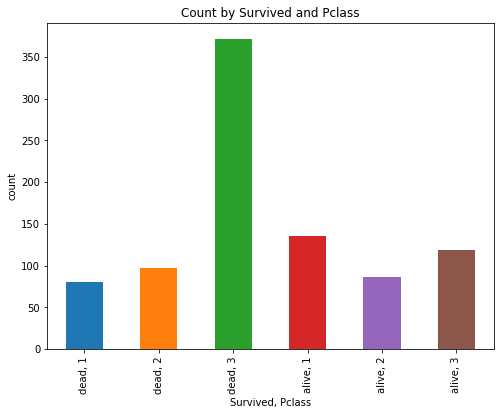

In [137]:
fig, ax = plt.subplots(figsize=(8,6))
survive.plot(kind = 'Bar', ax=ax)
ax.set_title('Count by Survived and Pclass')
ax.set_xticklabels(('dead, 1', 'dead, 2', 'dead, 3', 'alive, 1', 'alive, 2', 'alive, 3'))
ax.set_xlabel('Survived, Pclass')
ax.set_ylabel('count')
plt.show()

In [142]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,0.0
